In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'bearing-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F657721%2F1161622%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T215643Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6787c4a62db237ab32c38a46caf1a3a5a45c81a16754196be6da40b532b5b654baea3d41c592e739a6cdc578581bf79ebb69e6545d92af394605e021579ca5f31cd1cf60b4dbf6ff6eb5df0499e987038491123c2604708334f3a27f96ab2127a4e00443b0015d4e30747d9f5b529873803a78efafba4cd56603b7c50574bbcbc9cc63ecbebc04b95f4baa89b8d4052795e8444265fed3299f93a60ad0a357d7a4069ef9d101f9d14a415677a356dbd80514aa54bea3792e722dd999d2b3fd1f31774f60910d044558fa3d2eca8592c6208653b2081c92f8043cbee976aa2cdc1b65083fcd664ef4d15cce175be4561f88988ac1de8491adfd9e04d6fe841946,processed-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4940890%2F8318524%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T215643Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D452b484b975ed9d87b85486a044a71a356575598dc6e57a921d0aeca3fe06c75c7e6fb021a821042dd75a5e6c033950bbe0c8b664681ba4b5baa45a7cc150309951d3fff46a803c58317e32d3851c2c0e071d23d792bcd4018ae653b17be1c3c889b13e1366e7dde206f8148f45f1732f53c728cd73125d5393f8235ba607d920060332da73bbef55cde3580f3b1a8fc0541366de07a8bcbb5ae32d5dfbc97ee52aa86a695699ba09f6f15f72c10365606120c1a225a2e08f8bd767350bf6f2bd37812c585a850f4eb9320ca51a07e1fba622cd4e14e5de95164094a48be524b63c4dc5dee8e32a40aaac5fab1cca61a978b40c361558114a4717453f70bfd90'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


## Final Project Program

- Yash Gupta 22b2151
- Sourabh Kumar Mandal 22b2241
- Shubham Agarwal 22b2158


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

from pandas import DataFrame, Series

from sklearn import metrics
from sklearn.model_selection import cross_val_score

import seaborn as sns

import os

In [ ]:
# Specify the directory path
directory = "../input/bearing-dataset/1st_test/1st_test"

# List files in the directory
files = os.listdir(directory)

# Display the first few files
print(files[:5])  # Adjust the slice to display the desired number of files

['2003.11.18.07.12.30', '2003.11.22.05.16.56', '2003.11.25.14.37.32', '2003.11.19.11.56.07', '2003.11.24.04.21.24']


In [ ]:
# Read the first file into a DataFrame
file_path = "../input/bearing-dataset/1st_test/1st_test/" + files[1]
file = pd.read_table(file_path,
                     names=[f"b{i}{j}" for i in range(1, 5) for j in ["x", "y"]],
                     sep="\t")

# Display the first few rows of the DataFrame
print(file.head())



     b1x    b1y    b2x    b2y    b3x    b3y    b4x    b4y
0 -0.256 -0.015 -0.154 -0.212 -0.088 -0.061 -0.093 -0.098
1 -0.093  0.005 -0.198 -0.115 -0.161 -0.251 -0.022 -0.151
2 -0.027 -0.117 -0.132 -0.115 -0.054 -0.063 -0.344 -0.151
3 -0.183 -0.005 -0.222 -0.220 -0.208 -0.024 -0.034  0.017
4 -0.234  0.056 -0.208 -0.117 -0.017 -0.012 -0.105 -0.427


### Lets have a look at this file

/tmp/ipykernel_34/3266730856.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=file, x='observation', y=column, ci=None, ax=axes[row, col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_34/3266730856.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=file, x='observation', y=column, ci=None, ax=axes[row, col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldco

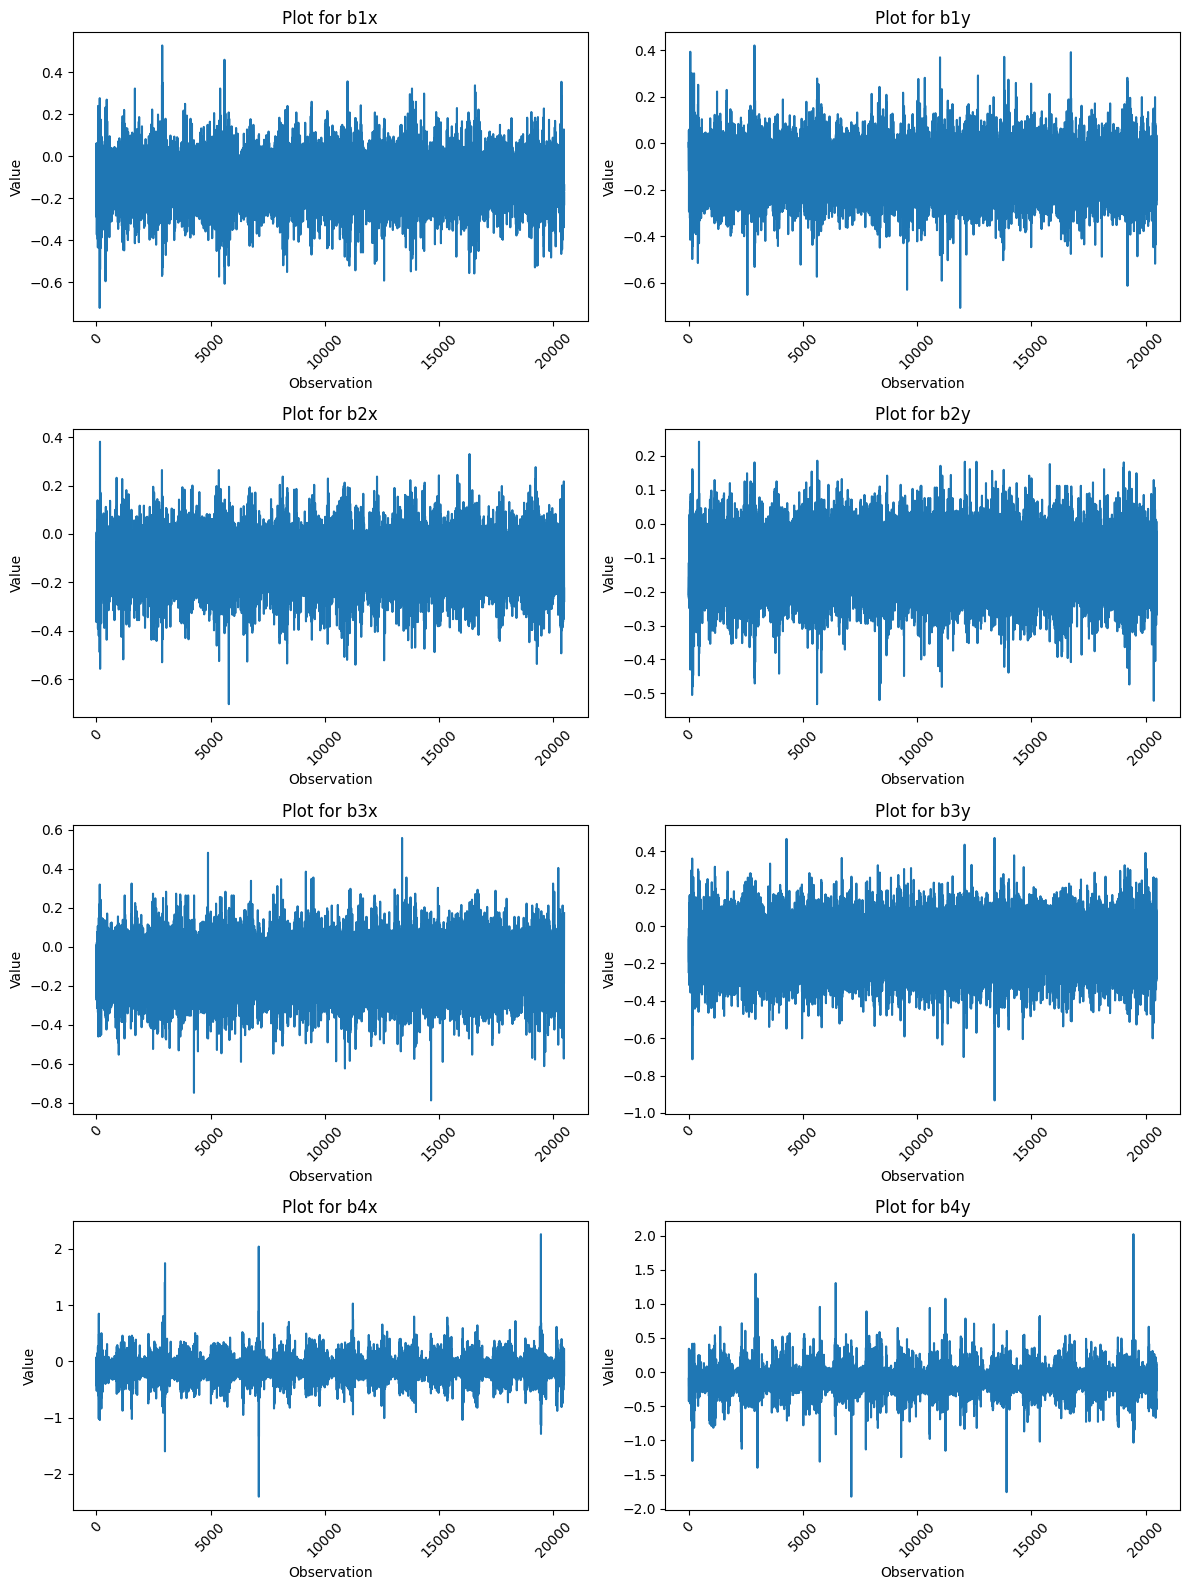

In [ ]:
# Add 'observation' column as numeric row names
file['observation'] = pd.to_numeric(file.index)

# Melt the DataFrame
melted_file = pd.melt(file, id_vars='observation')

# Create subplots with a (4, 2) matrix layout
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# Iterate over each column and plot on separate axes
for i, column in enumerate(file.columns[:-1]):  # Exclude the 'observation' column
    row = i // 2  # Determine the row index
    col = i % 2   # Determine the column index
    sns.lineplot(data=file, x='observation', y=column, ci=None, ax=axes[row, col])
    axes[row, col].set_title(f'Plot for {column}')
    axes[row, col].set_xlabel('Observation')
    axes[row, col].set_ylabel('Value')
    axes[row, col].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



It can be seen that the mean vibraiton level is negative for all bearings. That could be the result of sensor drift, faulty replacement, etc… Furthermore, the y-axis vibration on bearing 1 (second figure from the top left corner) seems to have outliers, but they do appear at regular-ish intervals. Since they are not orders of magnitude different than the rest of the data, I doubt they should be dropped. In any case, we have 2,156 files of this format, and examining each and every one individually will be a painfully slow process.

### Conventional Wisdom

Working with the raw vibration signals is not the best approach we can take. After all, we are looking for a slow, accumulating process within a very dynamic signal. Conventional wisdom dictates to apply signal processing techniques in the waveforms, to compress, analyze and interpret the data and to extract useful information for further diagnostics and prognostics purposes. Waveforms are traditionally analyzed by extracting features in the time- and frequency- domains.

More Specifically:
##### Time Domain Features:
1. Statistical Moments:
   - Mean
   - Standard Deviation
   - Skewness
   - Kurtosis

2. Shannon Entropy
3. Smoothness and Uniformity
4. Root-mean-squared (RMS), Absolute, and Peak-to-peak Value of the Waveform
5. Shape, Crest, Impulse, and Margin Factors
6. Autoregressive Coefficients

##### Frequency Domain Features (through FFT Transformation):
1. Vibration Levels at Characteristic Frequencies of the Machine
2. Frequency Center
3. Mean Square and Root-mean-square Frequency
4. Variance and Root-Variance of Frequency
5. Spectral Skewness, Kurtosis, Entropy
6. Similar Features in Higher Order Spectra




### Methods of spectral analysis

To be able to read various information about a machine from a spectrum, it is worth to know which frequencies would likely occur in such a spectrum. The spectrum usually contains a number of discrete lines and areas of increased noise. It is appropriate to divide the spectrum into areas, in which the various symptoms occur:

- Usually, the spectra evaluation process starts with the identification of the frequency pertinent of the rotational speed of the shaft - rotational frequency for which the notation 1X is used.
- Further, the integral multiples of this rotational frequencies (2X, 3X, …) are identified, also called harmonics.
- The spectrum is usually divided into three main areas:
    - Area below the rotational frequency, called subsynchronous
    - Area from rotational frequency, up to ten times of it
    - Area above 10X - the area of high-frequency events.



#### Bearing defect frequencies

Over the years, many formulas have been derived that can help to detect specific defects in rolling element bearings. They are based on the geometry of the bearing, the number of rolling elements, and the rotational frequency of the bearing.

Four types of faults are distinguished on the rolling bearing, depending on where the fault occurs. The so called bearing defect frequencies can be calculated on the basis of bearing parameters and rotational speed of the shaft:

- Ball Pass Frequency Inner (BPFI)
- Ball Pass Frequency Outer (BPFO)
- Ball Spin Frequency (BSF)
- Fundamental Train Frequency (FTF)

These are given by the following formulas:

- BPFI:
$$
   \frac{N}{2} \times \left(1 + \frac{B_d}{P_d} \times \cos(\phi)\right) \times n
$$

- BPFO:
$$
   \frac{N}{2} \times \left(1 - \frac{B_d}{P_d} \times \cos(\phi)\right) \times n = N \times FTF
$$

- BSF:
$$
   \frac{P_d}{2 \times B_d} \times \left(1 - \left(\frac{B_d}{P_d} \times \cos(\phi)\right)^2\right) \times n
$$

- FTF:
$$
   \frac{1}{2} \times \left(1 - \frac{B_d}{P_d} \times \cos(\phi)\right) \times n
$$

where:
- n: Shaft rotational speed [Hz] 2000 rpm
- N: No. of rolling elements [-] 16
- Bd: Diameter of a rolling element [mm] 0.331 in
- Pd: Pitch diameter [mm] 2.815 in
- ϕ: Contact angle [rad] 15.17*pi/180

### Feature Extraction

##### Time-domain Features

Let’s write a few wrappers to extract the above features for us, starting with time-domain features. Note that some of the features described earlier, such as the numerous shape factors, uniformity and so on, are just functions of the more fundamental features, like statistical moments and rms values. To avoid unnecessary production of information, we will only calculate the base features. Regarding the autoregressive coefficients, we will use an AR(8) model:

In [ ]:
import numpy as np
from scipy.stats import entropy
from statsmodels.tsa.ar_model import AutoReg

# Read the file
def read_file(filename):
    raw_vib = pd.read_table("..input/bearing-dataset/1st_test/1st_test/" + filename,
                             names=[f"b{i}{j}" for i in range(1, 5) for j in ["x", "y"]],
                             sep="\t")
    return raw_vib

# RMS value
def rms(x):
    return np.sqrt(np.mean(x**2))

# max absolute value
def max_abs(x):
    return np.max(np.abs(x))

# Peak-to-peak value
def p2p(x):
    return np.abs(np.max(x)) + np.abs(np.min(x))

# Shannon entropy (cut signal to 500 bins)
def entropy(x):
    bins = pd.cut(x, 500)
    return entropy(bins.value_counts())

# Autoregressive coefficients
def ar_coeffs(series, ar_order=8):
    try:
        model = AutoReg(series, lags=ar_order)
        model_fit = model.fit()
        return pd.Series(model_fit.params)
    except Exception as e:
        # In case the AR model fails to fit, return NaN values
        return pd.Series([np.nan] * (ar_order + 1))


Let’s wrap the function defined above in a wrapper to extract all time-domain features per file:

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
from statsmodels.tsa.ar_model import AutoReg

# Custom functions for specific calculations
def rms(series):
    return np.sqrt(np.mean(np.square(series)))

def max_abs(series):
    return np.max(np.abs(series))

def p2p(series):
    return np.max(series) - np.min(series)

# Function to calculate the AR coefficients
def ar_coeffs(series, ar_order=8):
    try:
        model = AutoReg(series.dropna(), lags=ar_order)
        model_fit = model.fit()
        return pd.Series(model_fit.params)
    except Exception:
        return pd.Series([np.nan] * (ar_order + 1))

def time_features(raw_vib_file):
    # Extract statistical moments
    moments = raw_vib_file.agg(['mean', 'std', 'skew', 'kurt'])

    # Custom metrics
    custom_metrics = pd.DataFrame({
        'entropy': raw_vib_file.apply(entropy),
        'rms': raw_vib_file.apply(rms),
        'max_abs': raw_vib_file.apply(max_abs),
        'p2p': raw_vib_file.apply(p2p)
    })

    # Calculate quantiles
    quants = raw_vib_file.quantile([0.25, 0.5, 0.75]).transpose()
    quants.columns = ['25% quantile', '50% quantile', '75% quantile']

    # Extract AR model coefficients for each column
    ar_features = pd.concat([ar_coeffs(raw_vib_file[col]) for col in raw_vib_file.columns], axis=1)
    ar_features.columns = [f"AR_{i}" for i in range(ar_features.shape[0])]

    # Combine all features
    all_features = pd.concat([moments, custom_metrics, quants], axis=0)

    return all_features



##### Frequency-domain features

Let’s begin by creating a function to apply the Fourier transform on a signal:

In [ ]:
def apply_FFT(x, sampling_rate=20000):
    # Center the signal first
    x_centered = x - np.mean(x)

    # Get the amplitudes
    fft_result = np.fft.fft(x_centered)
    amp = np.abs(fft_result[:len(x) // 2])  # Drop the second half - it's just a mirror of the first half

    # Make a vector containing the frequencies
    freq = np.linspace(0, sampling_rate / 2, len(x) // 2)

    # Create a DataFrame with amplitudes and frequencies (remove the dc term)
    fft_out = pd.DataFrame({"amp": amp[1:] / len(amp), "freq": freq[1:]})

    return fft_out


And a quick test on a random file:

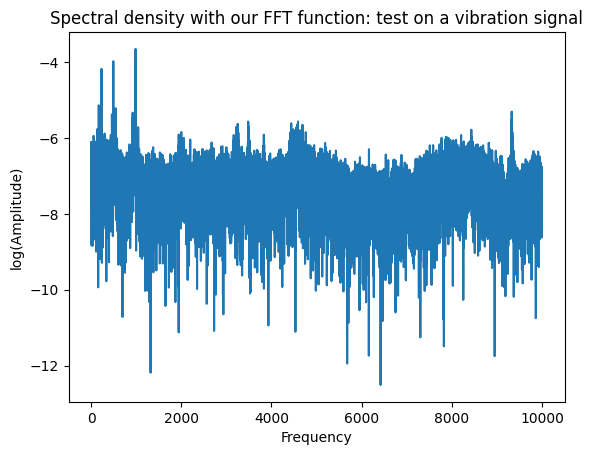

In [ ]:
# Read the first file into a DataFrame
file_path = "../input/bearing-dataset/1st_test/1st_test/" + files[1999]

# Read the file and inspect its structure
file_data = pd.read_table(file_path)
file_data.columns = [f"b{i}{j}" for i in range(1, 5) for j in ["x", "y"]]  # Naming the columns


# Extract the 'b2y' column
b2y_column = file_data['b2y']

# Apply FFT to the 'b2y' column
fft_result = apply_FFT(b2y_column)

# Plot the spectral density
plt.plot(fft_result['freq'], np.log(fft_result['amp']))
plt.title("Spectral density with our FFT function: test on a vibration signal")
plt.xlabel("Frequency")
plt.ylabel("log(Amplitude)")
plt.show()


Looks about right (qualitatively), noisy but more or less as expected. As it turns out, R has a base function to approximate the spectral density of a stationary signal, by fitting an autoregressive model on it. This might be helpful, as the expected result will be much less noisy. Let’s try it out:

(20479, 8)


/tmp/ipykernel_34/1952368783.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  denom = 1 - np.sum([ar_coefs[k] * np.exp(-1j * angular_freqs * k) for k in range(1, 101)], axis=0)


            freq       amp
0         0.0000 -5.033791
1         1.0001 -5.033852
2         2.0002 -5.034036
3         3.0003 -5.034342
4         4.0004 -5.034770
...          ...       ...
9995   9995.9996 -5.906282
9996   9996.9997 -5.906469
9997   9997.9998 -5.906602
9998   9998.9999 -5.906682
9999  10000.0000 -5.906709

[10000 rows x 2 columns]


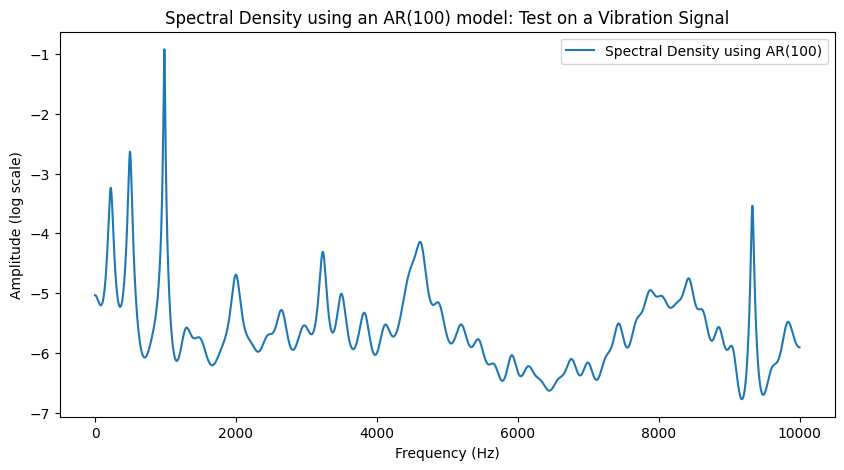

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from scipy.signal import periodogram
import statsmodels.api as sm
from scipy import signal
# Read the first file into a DataFrame
file_path = "../input/bearing-dataset/1st_test/1st_test/" + files[1999]

# Read the file and inspect its structure
file_data = pd.read_table(file_path)
file_data.columns = [f"b{i}{j}" for i in range(1, 5) for j in ["x", "y"]]
# Read the file and extract the 'b2y' column
print(file_data.shape)
raw_vib = file_data['b2y']

# Subtract the mean
# Remove the mean
raw_vib_centered = raw_vib - np.mean(raw_vib)

# Fit an AR(100) model
model = AutoReg(raw_vib_centered, lags=100)
model_fitted = model.fit()

# Model parameters
ar_coefs = model_fitted.params
sigma2 = model_fitted.sigma2

# Frequencies for the spectral density calculation
freqs = np.linspace(0, 0.5, 10000)  # Frequency from 0 to Nyquist frequency (0.5)
angular_freqs = 2 * np.pi * freqs

# Calculate the spectral density
denom = 1 - np.sum([ar_coefs[k] * np.exp(-1j * angular_freqs * k) for k in range(1, 101)], axis=0)
spectrum = sigma2 / (np.abs(denom) ** 2)

# Log of the spectral density
amp = np.log(spectrum)

# Create a DataFrame and plot
spec = pd.DataFrame({'freq': freqs * 20000, 'amp': amp})  # Scale frequencies to match the full scale
print(spec)
plt.figure(figsize=(10, 5))
plt.plot(spec['freq'], spec['amp'], label='Spectral Density using AR(100)')
plt.title("Spectral Density using an AR(100) model: Test on a Vibration Signal")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (log scale)')
plt.legend()
plt.show()

That’s a nice result. The peaks are clearly defined, and the result is less noisy overall. We will be using this function for the rest of the project. Before we move any further, we should calculate the characteristic frequencies of the bearings. We will be keeping an eye out on the FFT amplitude at these frequencies.

In [ ]:
N = 16  # No of rolling elements
n = 2000 / 60  # Rotational speed [Hz]
Bd = 0.331  # Rolling element diameter [in]
Pd = 2.815  # Pitch diameter [in]
phi = 15.17 * np.pi / 180  # Contact angle [rad]

# Get the frequencies
bearing_freqs = {
    "BPFI": N / 2 * (1 + Bd / Pd * np.cos(phi)) * n,
    "BPFO": N / 2 * (1 - Bd / Pd * np.cos(phi)) * n,
    "BSF": Pd / (2 * Bd) * (1 - (Bd / Pd * np.cos(phi))**2) * n,
    "FTF": 0.5 * (1 - Bd / Pd * np.cos(phi)) * n
}

print(bearing_freqs)


{'BPFI': 296.929862044058, 'BPFO': 236.40347128927536, 'BSF': 139.91665578625418, 'FTF': 14.77521695557971}


Now, let’s start making our wrappers to extract features in the frequency domain, beginning with a function to give us the amplitude of the spectral density on the characteristic bearing frequencies:

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from statsmodels.tsa.ar_model import AutoReg

def get_spectrum(signal, spectrum_points=10000, AR_order=100):
    # Center the signal
    signal_centered = signal - np.mean(signal)

    # Fit an AR model
    model = AutoReg(signal_centered, lags=AR_order)
    model_fitted = model.fit()


    # Model parameters
    ar_coefs = model_fitted.params
    sigma2 = model_fitted.sigma2

    # Frequencies for the spectral density calculation
    freqs = np.linspace(0, 0.5, spectrum_points)  # Frequency from 0 to Nyquist frequency (0.5)
    angular_freqs = 2 * np.pi * freqs

    # Calculate the spectral density
    denom = 1 - np.sum([ar_coefs[k] * np.exp(-1j * angular_freqs * k) for k in range(1, 101)], axis=0)
    spectrum = sigma2 / (np.abs(denom) ** 2)

    # Log of the spectral density
    amp = np.log(spectrum)

    # Create a DataFrame and plot
    spec = pd.DataFrame({'freq': freqs * 20000, 'amp': amp})

    '''# Compute spectral density using the Fourier transform of the AR coefficients
    freqs = np.linspace(0, np.pi, spectrum_points)
    angular_freqs = 2 * np.pi * freqs * (sampling_rate / 2 / np.pi)
    denom = 1 - np.sum([model_fitted.params[k] * np.exp(-1j * angular_freqs * k) for k in range(1, AR_order + 1)], axis=0)
    spectrum = model_fitted.sigma2 / (np.abs(denom) ** 2)
    amp = np.log(spectrum)'''

    return spec

def interpolate_spectrum(spectrum, f0):
    # Ensure the spectrum is sorted by frequency
    spectrum = spectrum.sort_values('freq')

    # Find indices for the closest points below and above f0
    idx_above = np.searchsorted(spectrum['freq'].values, f0, side='right')
    idx_below = max(idx_above - 1, 0)

    # Extract points for interpolation
    p1 = spectrum.iloc[idx_below]
    p2 = spectrum.iloc[min(idx_above, len(spectrum) - 1)]

    # Perform linear interpolation
    if p1['freq'] == p2['freq']:
        return p1['amp']
    else:
        return (p2['amp'] - p1['amp']) / (p2['freq'] - p1['freq']) * (f0 - p1['freq']) + p1['amp']



def get_spectra_at_char_freqs(spectrum, bearing_frequencies):
    # Use list comprehension to apply the interpolation function
    spec_val_char_freqs = [interpolate_spectrum(spectrum, f0) for f0 in bearing_frequencies]

    # Convert results to a DataFrame and transpose it
    spec_val_char_freqs_df = pd.DataFrame(spec_val_char_freqs, index=bearing_frequencies).transpose()
    spec_val_char_freqs_df.reset_index(drop=True, inplace=True)

    return spec_val_char_freqs_df




Next up, let’s write a function to return the top 10 frequencies, in terms of spectral density amplitude:

In [ ]:
from scipy.signal import find_peaks

def top_content_freqs(spectrum, no_freqs):
    # Find the indices at which peaks occur in the amplitude
    peaks, _ = find_peaks(spectrum['amp'])

    # Isolate these peaks and select the top <no_freqs>
    peak_freqs = spectrum.loc[peaks, ['freq', 'amp']]  # Include 'amp' to sort by it
    peak_freqs = peak_freqs.sort_values(by='amp', ascending=False).head(no_freqs)

    # Extract just the frequencies and transpose the result if needed
    top_freqs = peak_freqs['freq'].to_numpy()

    return top_freqs

Now, a function to return the statistical moments and some other features from a spectrum:

In [ ]:
from scipy.stats import skew, kurtosis, entropy

def trapz(x, y):
    # Re-center y values to zero minimum
    y = y + np.abs(np.min(y))

    # Calculate the area using the trapezoidal method
    area = np.trapz(y, x)
    return area

def get_spectral_moments(spectrum):
    f = spectrum['freq']
    s = spectrum['amp'] + np.abs(np.min(spectrum['amp']))  # Center to zero min

    # Use the previously defined trapezoidal rule function
    fc = trapz(f, s * f) / trapz(f, s)

    feats = {
        "fc": fc,  # frequency center
        "rmsf": np.sqrt(trapz(f, s * f * f) / trapz(f, s)),  # root mean square frequency
        "vf": np.sqrt(trapz(f, (f - fc) ** 2 * s) / trapz(f, s)),  # root variance frequency
        "sp_mean": np.mean(spectrum['amp']),
        "sp_sd": np.std(spectrum['amp']),
        "sp_skew": skew(spectrum['amp']),
        "sp_kurtosis": kurtosis(spectrum['amp']),
        "sp_entropy": entropy(np.exp(spectrum['amp'] - np.max(spectrum['amp']))),  # adjust for log scale
        "power": np.sum(np.exp(spectrum['amp']))  # power of the signal
    }

    return feats

Next up, a function to split a spectrum into the three different frequency areas:

In [ ]:
def split_spectrum(spectrum):
    # Rotational speed of the shaft in Hz (2000 rpm)
    rotational_speed = 2000 / 60

    # Define the frequency ranges based on the rotational speed
    low_spectr = spectrum[spectrum['freq'] < rotational_speed]
    mid_spectr = spectrum[(spectrum['freq'] >= rotational_speed) & (spectrum['freq'] < 10 * rotational_speed)]
    high_spectr = spectrum[spectrum['freq'] >= 10 * rotational_speed]

    # Store the sub-spectra in a dictionary
    out = {
        "low_spectr": low_spectr,
        "mid_spectr": mid_spectr,
        "high_spectr": high_spectr
    }

    return out

Wrapper for all the frequency features:

In [ ]:
def frequency_features(raw_vib_file, bearing_frequencies):
    # Read the raw vibration CSV file
    raw_vib_data = raw_vib_file

    # Define functions for spectral analysis if not already defined
    # Assume get_spectrum, get_spectra_at_char_freqs, top_content_freqs, split_spectrum, get_spectral_moments are defined

    # Get the spectra for each column (assuming each column is a separate time series)
    spectra = {col: get_spectrum(raw_vib_data[col]) for col in raw_vib_data.columns}

    # Calculate spectral densities at the characteristic bearing frequencies
    bear_f_spectra = {col: get_spectra_at_char_freqs(spectra[col], bearing_frequencies) for col in raw_vib_data.columns}
    bear_f_spectra = pd.concat(bear_f_spectra, axis=1)
    bear_f_spectra.columns = [f"{col}.{bf}" for col in raw_vib_data.columns for bf in ['BPFI', 'BPFO', 'BSF', 'FTF']]

    # Return top n frequencies
    no_freqs = 15
    top_freqs = {col: top_content_freqs(spectra[col], no_freqs) for col in raw_vib_data.columns}
    top_freqs = pd.concat(top_freqs, axis=1)
    top_freqs.columns = [f"{col}.freq.{i+1}" for col in raw_vib_data.columns for i in range(no_freqs)]

    # Split the spectra into three frequency areas and calculate spectral moments
    split_spectra = {col: split_spectrum(spectra[col]) for col in raw_vib_data.columns}
    moments = {col: get_spectral_moments(split_spectra[col]) for col in raw_vib_data.columns}
    moments = pd.concat(moments, axis=1)
    moments.columns = [f"{col}.{stat}" for col in raw_vib_data.columns for stat in ['fc', 'rmsf', 'vf', 'sp_mean', 'sp_sd', 'sp_skew', 'sp_kurtosis', 'sp_entropy', 'power']]

    # Combine all features into one DataFrame
    freq_feats = pd.concat([bear_f_spectra, top_freqs, moments], axis=1)

    # Return the DataFrame containing the extracted features per file
    return freq_feats

Finally, a small wrapper to bind time- and frequency- domain features together:

In [ ]:
def calculate_features(filename, bearing_frequencies):
    # Read the vibrations file
    # Read the file and inspect its structure

    vib_file=filename
    # print(vib_file)  # Assuming CSV format; adapt if necessary

    # Calculate time domain features (assuming time_features function is defined)
    time_feats = time_features(vib_file)

    # Calculate frequency domain features
    freq_feats = frequency_features(vib_file, bearing_frequencies)

    # Combine the features
    feats = pd.concat([time_feats, freq_feats], axis=1)

    # Return the combined features
    return feats

We will also need to append the labels to the dataset - we do need something to classify after all! The file numbering according to the description was done off-line beforehand (which explains the number of repetitions of each label):

In [ ]:
import pandas as pd

def create_labels():
    # Define labels for each bearing state with repetitive counts
    labels = {
        "b1.state": ["early"] * 151 + ["suspect"] * 449 + ["normal"] * 899 + ["suspect"] * 599 + ["imminent_failure"] * 58,
        "b2.state": ["early"] * 500 + ["normal"] * 1500 + ["suspect"] * 120 + ["imminent_failure"] * 36,
        "b3.state": ["early"] * 500 + ["normal"] * 1290 + ["suspect"] * 330 + ["inner_race_failure"] * 36,
        "b4.state": ["early"] * 200 + ["normal"] * 800 + ["suspect"] * 435 + ["inner_race_failure"] * 405 + ["stage_2_failure"] * 316
    }

    # Convert the dictionary to a DataFrame
    label_df = pd.DataFrame(labels)

    # You may need to handle the DataFrame size if columns have different lengths
    # This will ensure all columns are the same length by filling any missing values
    label_df = label_df.apply(lambda col: col.dropna().reset_index(drop=True))

    return label_df

# Create the label DataFrame
labels_df = create_labels()
print(labels_df)


              b1.state          b2.state            b3.state         b4.state
0                early             early               early            early
1                early             early               early            early
2                early             early               early            early
3                early             early               early            early
4                early             early               early            early
...                ...               ...                 ...              ...
2151  imminent_failure  imminent_failure  inner_race_failure  stage_2_failure
2152  imminent_failure  imminent_failure  inner_race_failure  stage_2_failure
2153  imminent_failure  imminent_failure  inner_race_failure  stage_2_failure
2154  imminent_failure  imminent_failure  inner_race_failure  stage_2_failure
2155  imminent_failure  imminent_failure  inner_race_failure  stage_2_failure

[2156 rows x 4 columns]


And finally, let’s write a small function to perfrom a bit of post-processing on the dataset, to bring it into a format suiable for further analysis:

In [ ]:
def postprocess_dset(data, bearing):
    # Filter columns that include the specific bearing in their names
    bearing_dset = data.filter(regex=bearing)

    # Remove the bearing identifier from the column names
    bearing_dset.columns = bearing_dset.columns.str.replace(bearing, "", regex=False)

    # Additional cleanup to remove ".state" if present, and replace it with "state"
    bearing_dset.columns = bearing_dset.columns.str.replace(".state", "state", regex=False)

    return bearing_dset


All done! Let’s extract the features for the entire dataset, and store them in a .csv file. Note that we do not necessairly need the filenames themselves, as the dataset is already chronologically ordered, due to the filename format (you can easily check this with the is.unsorted() function).

In [ ]:
import os

def list_files(directory):
    files = []
    with os.scandir(directory) as entries:
        for entry in entries:
            if entry.is_file():
                files.append(entry.name)
    return files

# Example usage
directory = "../input/bearing-dataset/1st_test/1st_test"
files = list_files(directory)
# print(files)

In [ ]:
def extract_features(input_dir, output_file):
    # List all files in the input directory
    files = os.listdir(input_dir)

    # Extract the features from each file and combine them into a single DataFrame
    features = pd.concat([calculate_features(os.path.join(input_dir, f), bearing_freqs) for f in files])

    # Assuming `labels` is predefined, combine it with features
    # Ensure `labels` is in the correct format, either loaded beforehand or defined globally
    dset = pd.concat([features, labels], axis=1)

    # Postprocess the dataset
    # Example of post-processing for multiple prefixes, assuming 4 bearings as in the R code
    dset_processed = pd.concat([postprocess_dset(f"b{i}", dset) for i in range(1, 5)])

    # Write the dataset to a CSV file
    dset_processed.to_csv(output_file, index=False)

# Example call (do not run online if the dataset or methods are not ready)
# extract_features("../input/1st_test/1st_test", "processed_data.csv")


### Class Balance

Let’s have a look at class imbalances:

In [ ]:
# Read in the extracted features
data = pd.read_csv("../input/processed-dataset/processed_data.csv", index_col=0)
data.reset_index(inplace=True)
print(data.head())


     x_mean    y_mean      x_sd      y_sd  x_skewness  y_skewness  x_kurtosis  \
0 -0.094593 -0.093880  0.081124  0.070650   -0.029991    0.220100    1.068765   
1 -0.094903 -0.093891  0.079517  0.069531   -0.070070    0.126489    1.161145   
2 -0.096187 -0.095863  0.080219  0.069465   -0.041643    0.151039    0.985896   
3 -0.095613 -0.095307  0.080827  0.071267    0.005161    0.099487    1.033900   
4 -0.095133 -0.095495  0.082036  0.072155   -0.060191    0.095877    1.109762   

   y_kurtosis  x_entropy  y_entropy  ...  y.hi_spectr.fc  y.hi_spectr.rmsf  \
0    3.065291   4.803024   4.585194  ...     4518.397792       5387.724595   
1    2.000528   4.844823   4.674006  ...     4448.616799       5305.625441   
2    1.968466   4.889290   4.725046  ...     4434.833388       5308.702103   
3    1.744906   4.852678   4.750846  ...     4497.673993       5360.509743   
4    1.180752   4.889980   4.783190  ...     4418.813612       5287.953730   

   y.hi_spectr.vf  y.hi_spectr.sp_mean  y.hi

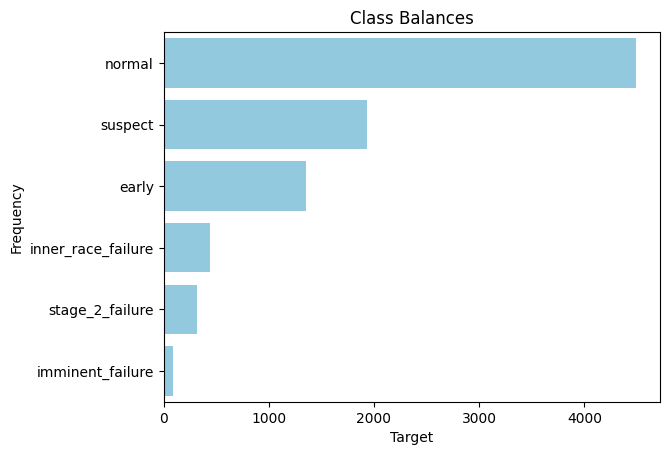

In [ ]:
# Count the frequency of each class in the 'state' column
class_counts = data['state'].value_counts().reset_index()
class_counts.columns = ['state', 'frequency']



# Calculate the frequency of each state
state_counts = data['state'].value_counts().reset_index()
state_counts.columns = ['state', 'frequency']

# Plotting the class balances
sns.barplot(x='frequency', y='state', data=state_counts,color='skyblue')
plt.title('Class Balances')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

There is class imbalance, but not so extreme to justify reframing the classification problem as an anomaly detection problem. Using F1 score as our classifier’s objective will take care of the imbalance.


### Train / Test split

Let’s move on with the actual split:

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('state', axis=1)  # Features
y = data['state']  # Target variable

print(y)

# Stratified 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


0                 early
1                 early
2                 early
3                 early
4                 early
             ...       
8619    stage_2_failure
8620    stage_2_failure
8621    stage_2_failure
8622    stage_2_failure
8623    stage_2_failure
Name: state, Length: 8624, dtype: object
(6036, 130) (2588, 130) (6036,) (2588,)


### Feature Selection

Let’s first assess predictor importance. We’ll be using a model-based approach, based on a random forest classifier. The reason for choosing a model-based approach is that, being tied to model performance, it may be able to incorporate the correlation structure between the predictors into the importance calculation.

Let’s train a random forest classifier on the training set:

and get the importance of each dependent variable:


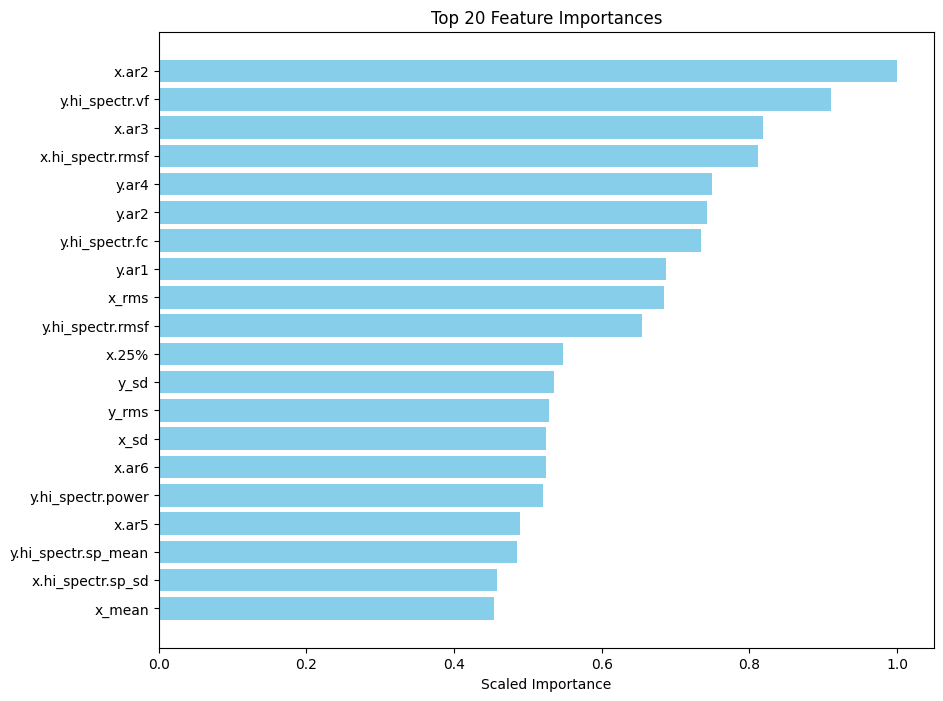

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# RandomForestClassifier
rf = RandomForestClassifier(oob_score=True, random_state=42, verbose=0)
rf.fit(X_train, y_train)

# Feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Scaling the importances by dividing by the maximum
importances_df['Importance'] = importances_df['Importance'] / importances_df['Importance'].max()

# Sorting the features by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotting the top 20 features
plt.figure(figsize=(10, 8))
plt.barh(importances_df['Feature'][:20], importances_df['Importance'][:20], color='skyblue')
plt.xlabel('Scaled Importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # To display the most important at the top
plt.show()


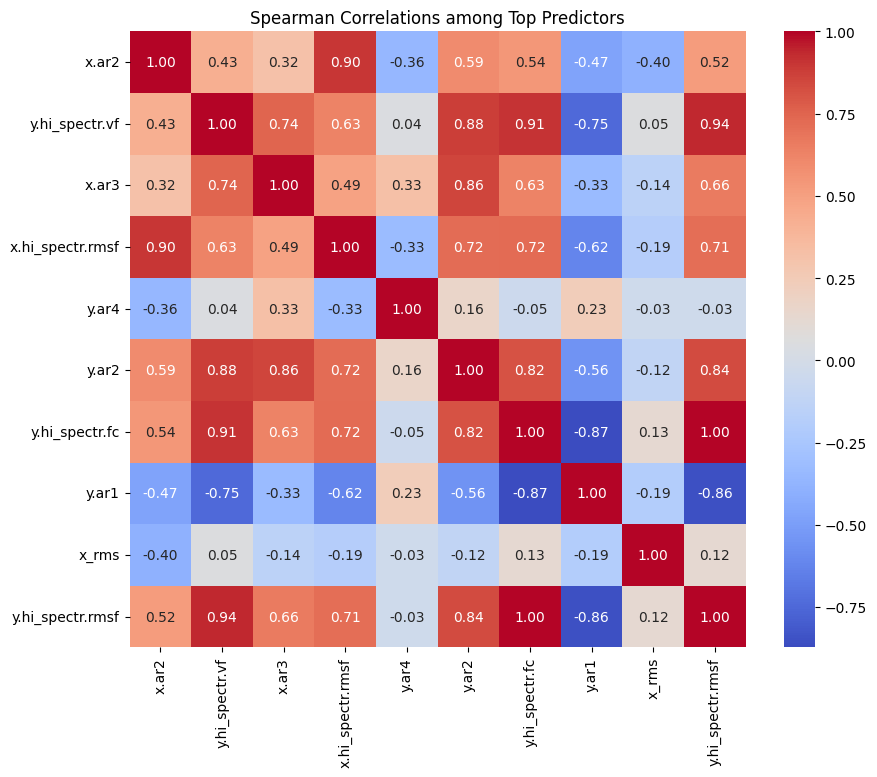

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Assuming 'importances' is your feature importance data from the RandomForest model
# Let's create a DataFrame as an example
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
})

# Get the top ten predictors
n_predictors = 10
top_predictors = feature_importances.nlargest(n_predictors, 'importance')['feature']


# Extract these top predictors from the dataset
train, test = train_test_split(data, test_size=0.3, stratify=data['state'], random_state=42)
top_data = train[top_predictors]

# Compute the Spearman correlation matrix
correlation_matrix = top_data.corr(method='spearman')

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Spearman Correlations among Top Predictors')
plt.show()


In [ ]:
print(top_predictors)

23                x.ar2
123      y.hi_spectr.vf
24                x.ar3
95     x.hi_spectr.rmsf
33                y.ar4
31                y.ar2
121      y.hi_spectr.fc
30                y.ar1
10                x_rms
122    y.hi_spectr.rmsf
Name: feature, dtype: object


In [ ]:
top_predictors = [
    "y.hi_spectr.vf", "y.ar4", "y.ar2", "x.ar2",
    "y.hi_spectr.fc", "x.hi_spectr.rmsf", "x.ar3",
    "x_rms", "y.ar1", "y_rms"
]
print(all(column in train.columns for column in top_predictors))


True


In [ ]:
if 'state' in train.columns:
    top_data_with_state = train[top_predictors + ['state']]
    print("Data ready for further processing.")
else:
    print("'state' column is missing from the DataFrame.")


Data ready for further processing.


In [ ]:
melted_data = pd.melt(top_data_with_state, id_vars='state', var_name='variable', value_name='value')


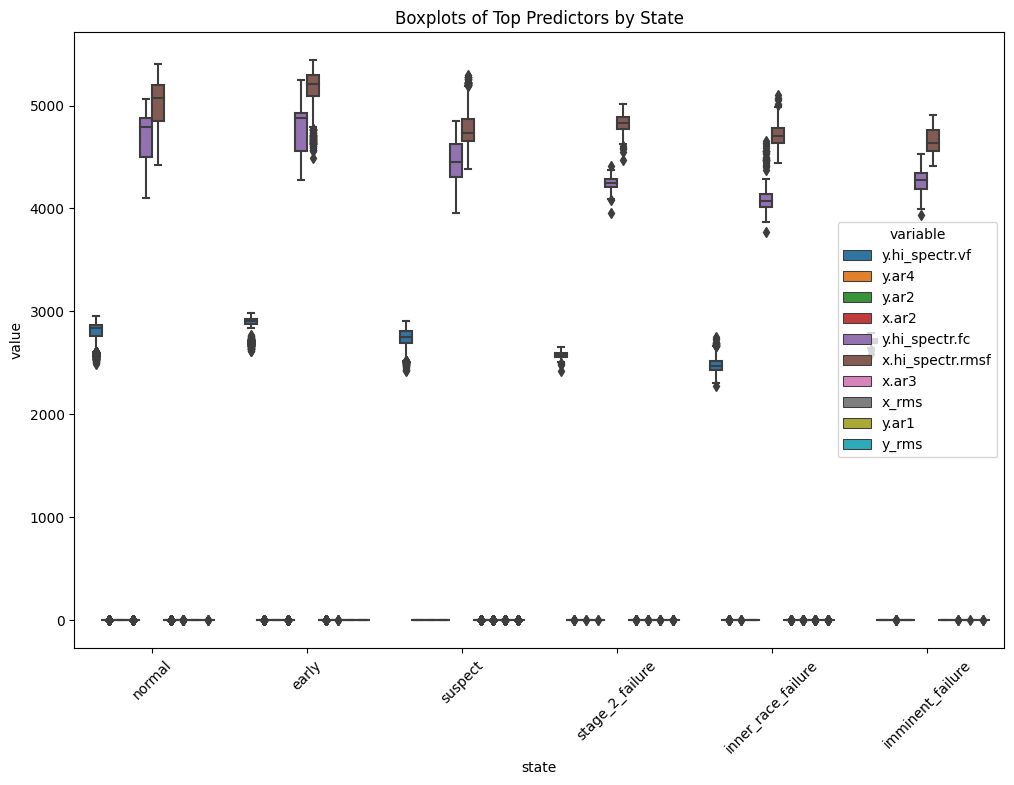

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(data=melted_data, x='state', y='value', hue='variable')
plt.xticks(rotation=45)
plt.title('Boxplots of Top Predictors by State')
plt.show()


In [ ]:
# Define the columns you want to select
cols = ["x_entropy", "y.ar3", "x.hi_spectr.sp_entropy", "y.ar2",
        "x.hi_spectr.vf", "y_entropy", "y.ar5", "x.hi_spectr.rmsf"]

# Assuming 'train' is your DataFrame and contains these columns and 'state'
selected_data = train[cols + ['state']]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

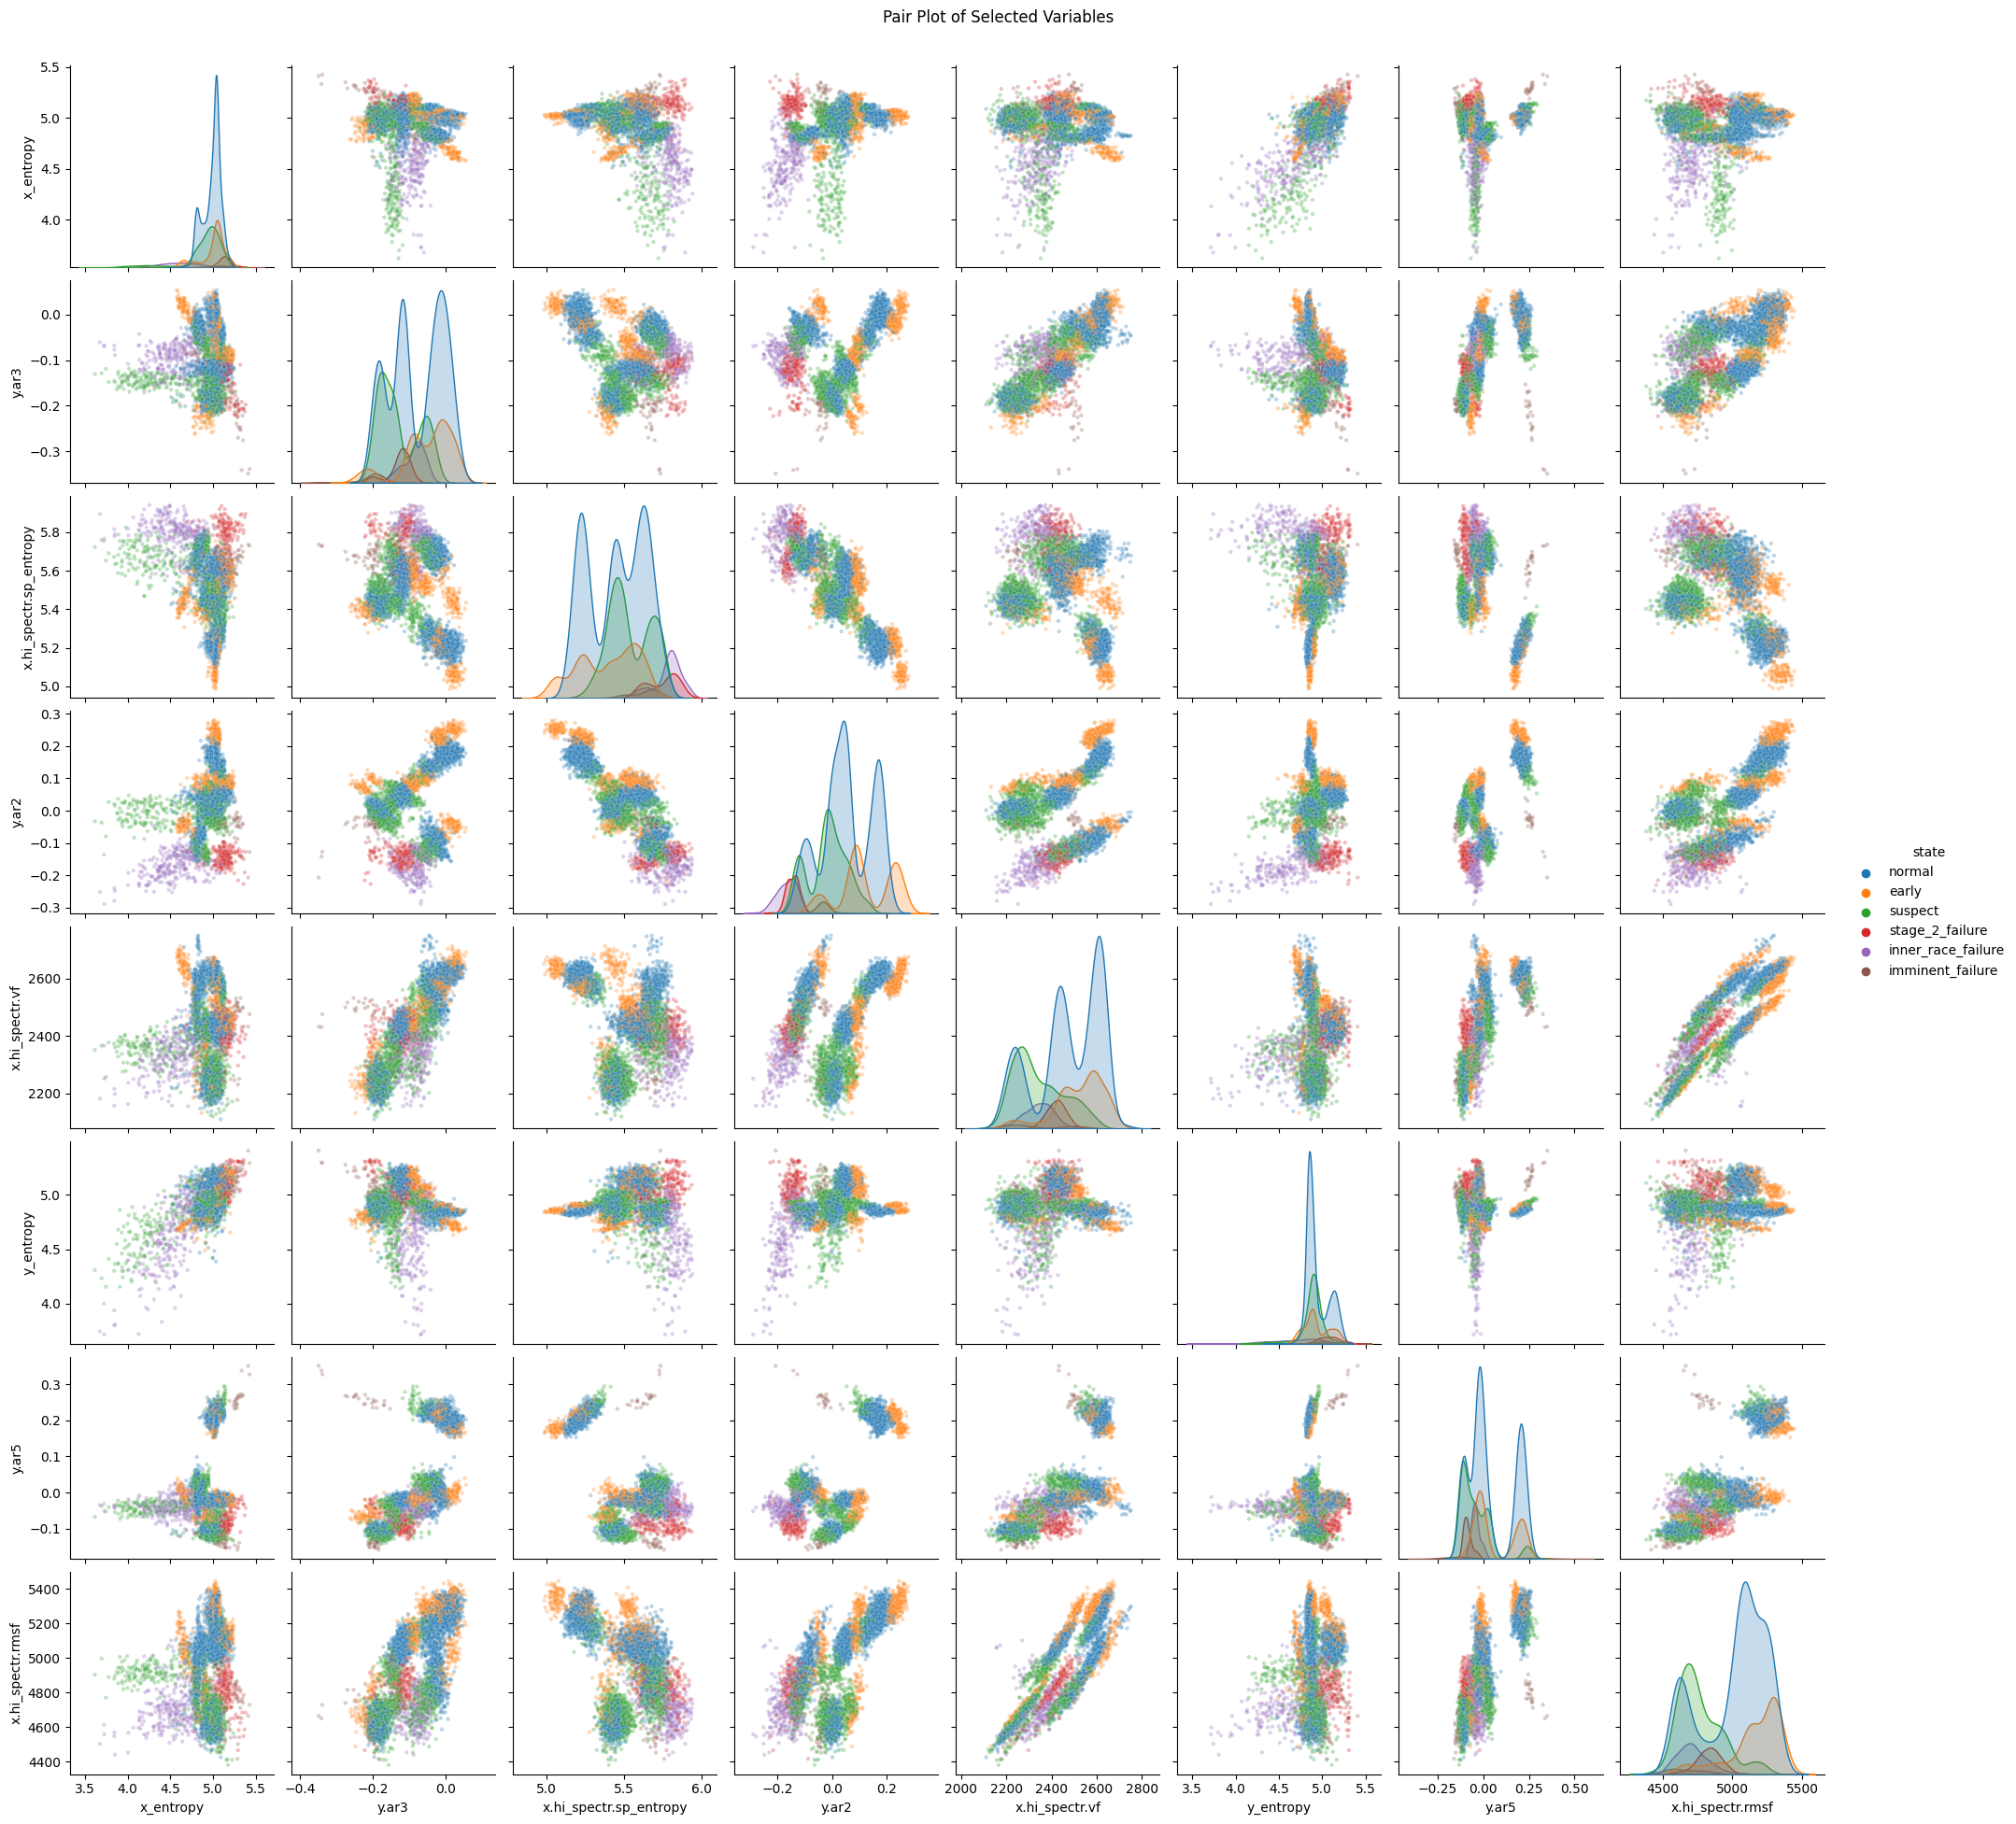

In [ ]:
# Create a pairplot
pair_plot = sns.pairplot(selected_data, hue='state', plot_kws={'alpha': 0.3, 's': 10}, diag_kind="auto")

# Adjust the aesthetics
pair_plot.fig.subplots_adjust(top=0.95)  # adjust the Figure in seaborn
pair_plot.fig.suptitle('Pair Plot of Selected Variables')

# Display the plot
plt.show()

### Predictive Modeling

In [ ]:
# Read in the extracted features
data = pd.read_csv("../input/processed-dataset/processed_data.csv", index_col=0)
data.reset_index(inplace=True)
# print(data.head())

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, stratify=data['state'], random_state=42)
X_train = train[cols]
y_train = train['state']
X_test = test[cols]
y_test= test['state']

The best_model is a Gradient Boosting Classifier that has been optimized using GridSearchCV with a 10-fold, thrice-repeated stratified cross-validation.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

# Train control: 10-fold cross-validation, repeated 3 times
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# Define the model
gbm_model = GradientBoostingClassifier(random_state=42)

# Parameter grid for tuning (example: adjusting learning rate and n_estimators)
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [100, 200, 300]
}

# Train the model using GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=gbm_model, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=0)
grid_search.fit(X_train, y_train)

# Best model after grid search
best_model = grid_search.best_estimator_


In [ ]:
# Custom scorer for Kappa
kappa_scorer = make_scorer(cohen_kappa_score)

# Now, use the best model from your GridSearchCV
# best_model = grid_search.best_estimator_

# Calculate the average Kappa score using cross-validation
# Reuse the cv object from your grid search setup to ensure consistency
kappa_scores = cross_val_score(best_model, X_train, y_train, scoring=kappa_scorer, cv=cv)
print("Average Kappa Score:", kappa_scores.mean())

Average Kappa Score: 0.8647790509847343


This model is fine-tuned based on a parameter grid that adjusts learning rate and the number of estimators, ensuring the best combination of these parameters for maximizing accuracy on the training data.

In [ ]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the predictions
print(classification_report(y_test, y_pred))


                    precision    recall  f1-score   support

             early       0.93      0.97      0.95       406
  imminent_failure       0.88      0.54      0.67        28
inner_race_failure       0.96      0.95      0.96       132
            normal       0.91      0.94      0.92      1347
   stage_2_failure       0.98      0.89      0.93        95
           suspect       0.85      0.80      0.83       580

          accuracy                           0.91      2588
         macro avg       0.92      0.85      0.88      2588
      weighted avg       0.91      0.91      0.91      2588



In [ ]:
# Predict on the test set
y_pred = best_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, cohen_kappa_score

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
kappa = cohen_kappa_score(y_test, y_pred)

# Print the average Kappa score
print("Average Kappa Score:", kappa_scores.mean())

# Print a more detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 393    0    0   13    0    0]
 [   0   15    0    0    0   13]
 [   0    0  126    0    2    4]
 [  27    0    0 1263    0   57]
 [   0    0    4    0   85    6]
 [   3    2    1  108    0  466]]
Average Kappa Score: 0.8647790509847343

Classification Report:
                    precision    recall  f1-score   support

             early       0.93      0.97      0.95       406
  imminent_failure       0.88      0.54      0.67        28
inner_race_failure       0.96      0.95      0.96       132
            normal       0.91      0.94      0.92      1347
   stage_2_failure       0.98      0.89      0.93        95
           suspect       0.85      0.80      0.83       580

          accuracy                           0.91      2588
         macro avg       0.92      0.85      0.88      2588
      weighted avg       0.91      0.91      0.91      2588



We have a Kappa value of 86%, which is quite decent. Taking a closer look on the confusion matrix, we can see that - generally speaking - there are small levels of confusion between early and normal data, as well as between suspect and the different failure modes. It is also nice to see that there is very little confusion between the classes relating to good health and those of bad health. In addition, the failure classes are only ever classified as different types of failures, and never as normal behaviour. The most confusion seems to be in the suspect class, but that is understandable, considering that the suspect class is a just a transition from normal to a failure pattern.

These are quite satisfactory results. Of course, we could go into more advanced modeling approaches, but the overall performance is quite good. Let’s re-train over the entire training set, and see how we fare on the test set:



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming you've already loaded your data into X_train and y_train

# Encode the labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Define the model
gbm_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', verbosity=0)

# Custom scorer for Kappa
kappa_scorer = make_scorer(cohen_kappa_score)

# Train the model with encoded labels
gbm_model.fit(X_train, y_train_encoded)

# For cross-validation example (if needed)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(gbm_model, X_train, y_train_encoded, scoring=kappa_scorer, cv=cv)
print("Average Kappa Score:", scores.mean())


Average Kappa Score: 0.8781517616998864


In [ ]:
# Predict on the test set
y_pred = gbm_model.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder

# Assuming y_pred comes from the model which predicted on the encoded labels
# Decode y_pred back to original labels if necessary
label_encoder = LabelEncoder()
label_encoder.fit(y_train)  # Fit to original training labels (not encoded)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Now compare with original labels
conf_matrix = confusion_matrix(y_test, y_pred_labels)
kappa = cohen_kappa_score(y_test, y_pred_labels)

# Display the confusion matrix and Kappa
print("Confusion Matrix:")
print(conf_matrix)
print("\nKappa Score:", kappa)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels))


Confusion Matrix:
[[ 394    0    0   12    0    0]
 [   0   16    0    1    0   11]
 [   0    0  125    1    3    3]
 [  25    0    0 1267    0   55]
 [   0    3    3    0   84    5]
 [   3    0    1  102    0  474]]

Kappa Score: 0.8634062417965825

Classification Report:
                    precision    recall  f1-score   support

             early       0.93      0.97      0.95       406
  imminent_failure       0.84      0.57      0.68        28
inner_race_failure       0.97      0.95      0.96       132
            normal       0.92      0.94      0.93      1347
   stage_2_failure       0.97      0.88      0.92        95
           suspect       0.86      0.82      0.84       580

          accuracy                           0.91      2588
         macro avg       0.92      0.86      0.88      2588
      weighted avg       0.91      0.91      0.91      2588



Indeed, we get similar results on the prediction set as before. Small confusion on the suspect class, very little to no confusion between early and normal health states and the different failure modes.

### Conclusions

We have built a classifier that can determine the health status of rolling element bearings, as well as recognize the type of fault that is uderway. We have experimented quite a lot with feature extraction (and reduction), which led us to choose 8 features from the two vibration signals (x- and y- axis). We’ve managed to get a 90% accuracy on the prediction set, but the errors are to be expected: There are small levels of confusion between early and normal data, as well as between “suspect” and the different “failure” modes. It is also nice to see that there is very little confusion between the classes relating to good health and those of bad health. In addition, the failure classes are only ever classified as different types of failures, and never as normal behaviour. The most confusion seems to be in the suspect class, but that is understandable, considering that the suspect class is a just a transition from normal to a failure pattern.